# Matplotlib Tutorial

### Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

### Configure plots to be inline

In [2]:
%matplotlib inline

## Using pyplot Global Mode

Note: Scope of plt.plot does not extend beyond the current cell

In [3]:
# generate random data on two variables with 3 dimentions
x = pd.period_range(pd.datetime.now(), periods = 200, freq = 'd')
x = x.to_timestamp().to_pydatetime()
y = np.random.randn(200, 3).cumsum(0)

In [ ]:
x

In [ ]:
y

In [ ]:
# plot line graph
plt.plot(x, y)

### Configuring Matplotlib

In [ ]:
# alter line and figure parameters
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['figure.figsize'] = (8, 4)

# plot line graph
plt.plot(x, y)

### Labels and Legends

In [ ]:
# get reference to the plot
plots = plt.plot(x, y)

# define the legend
plt.legend(plots, 
           ('first', 'second', 'third'), # labels
           loc = 'lower left', # best location trying to avoid lines
           framealpha = 0.5, # set transparency
           prop = {'size':'small', 'family':'monospace'} # font settings
          )

### Titles and Axes Labels

In [ ]:
# set plot title
plt.title('Random Trends')

# mark axes labels
plt.xlabel('Date')
plt.ylabel('Cumulative Sum')

# add additional text
plt.figtext(0.99, 0.99, # location of anchor point
           'Data Visualization Tutorial', # text content
           ha = 'right', va = 'bottom' # alignment
           )

# prevent label clipping, keep all text inside figure boundaries
plt.tight_layout()

# plot line graph
plt.plot(x, y)

### Add grid lines

In [ ]:
# enable grid lines
plt.grid(True)

# plot line graph
plt.plot(x, y)

### Saving plot to file

In [ ]:
# plot line graph
plt.plot(x, y)

# save in file
plt.tight_layout() # good idea before saving
plt.savefig('random3.png')

## Using Object Oriented Approach

### Plot in a Plot

In [4]:
# initialize figure object
fig = plt.figure(
    figsize = (8, 4), # figure size in inches
    dpi = 200, # dots per inch,
    tight_layout = True, # fit within figure boundaries
    linewidth = 1, # line pixel thickness
    edgecolor = 'r' # border color
    )

<Figure size 1600x800 with 0 Axes>

In [ ]:
fig

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


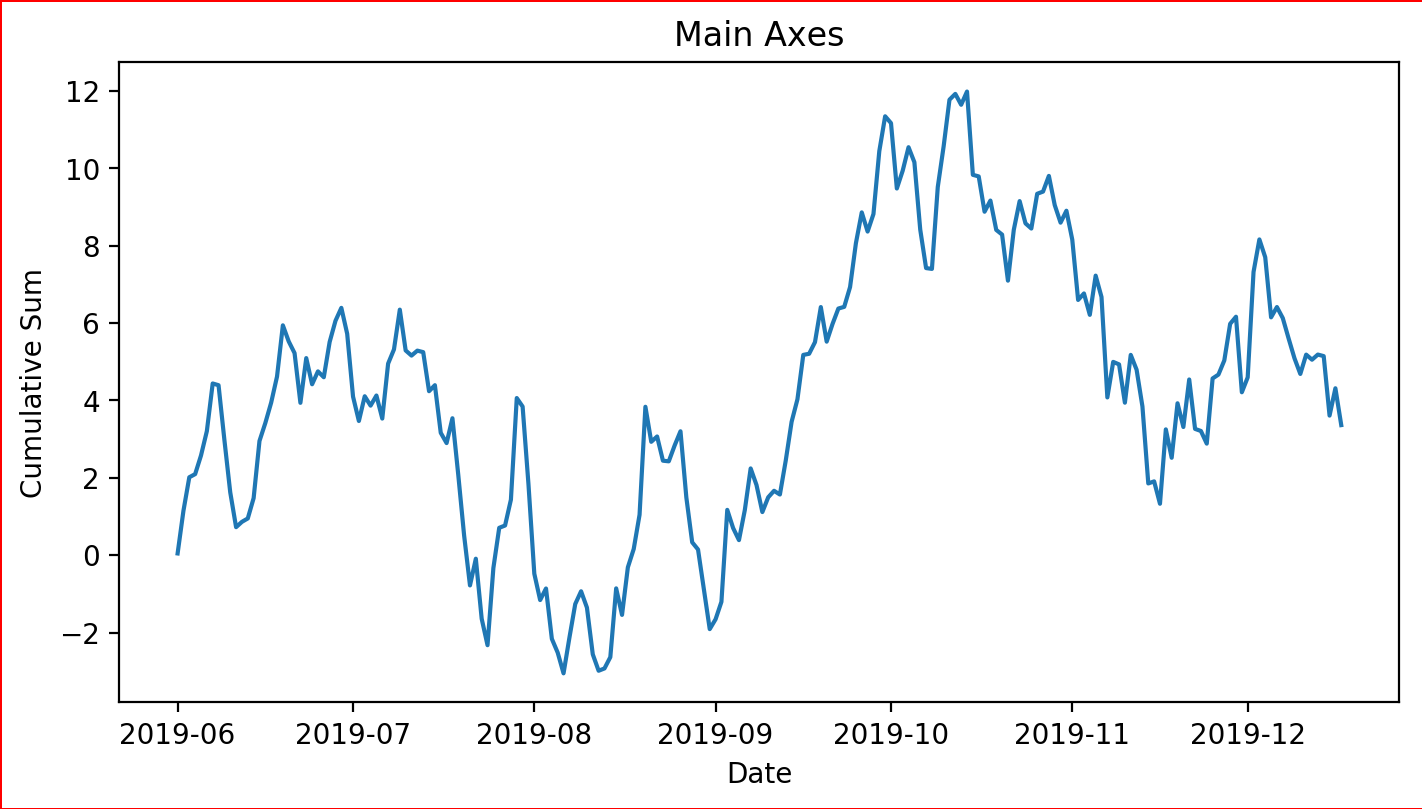

In [5]:
# define main axes position
ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])

# axes properties
ax1.set_title ('Main Axes')
ax1.plot(x, y[:, 0])
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative Sum')

fig

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


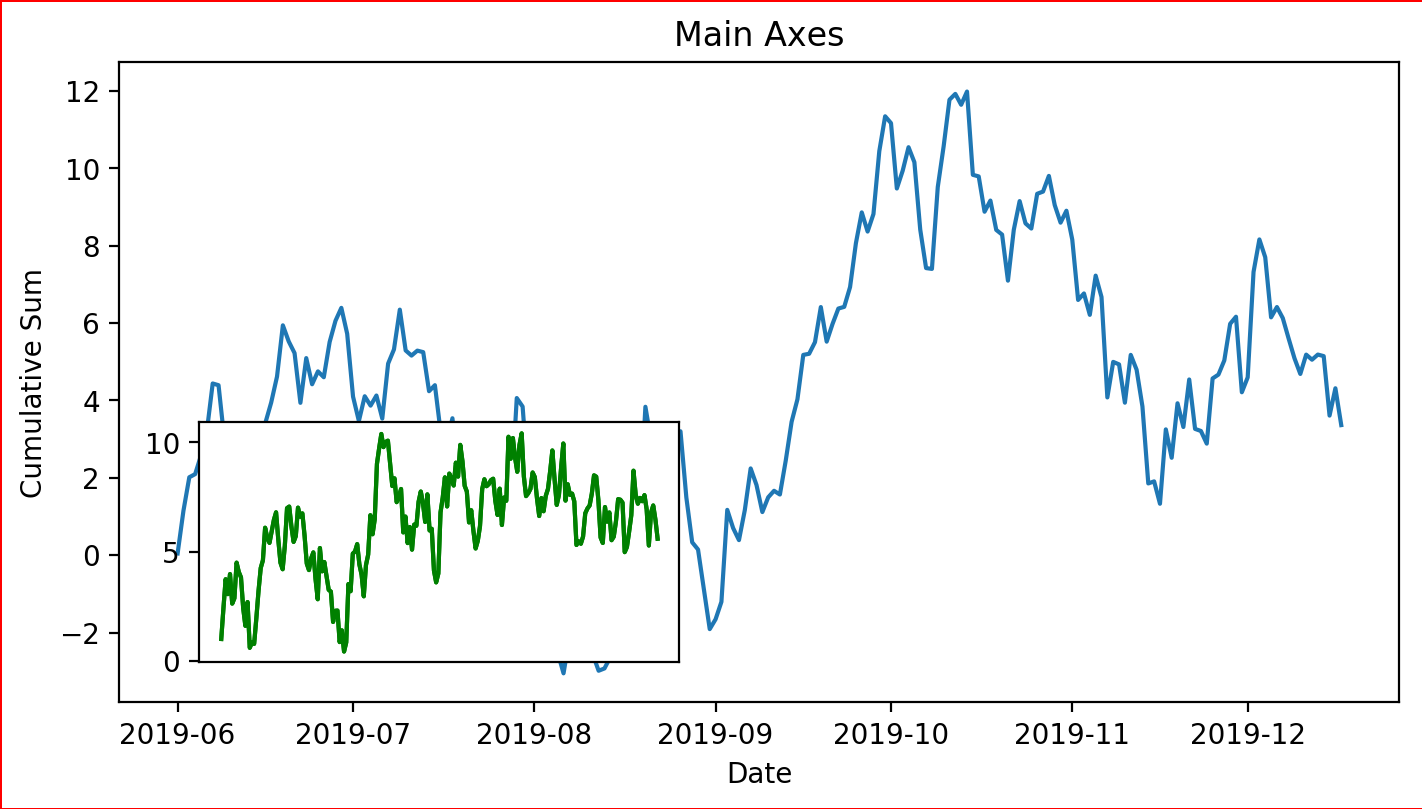

In [7]:
# define child axes position
ax2 = fig.add_axes([0.15, 0.15, 0.3, 0.3])

ax2.plot(x, y[:, 1], color='g') # plot child data in green color
ax2.set_xticks([]) # removes x ticks and labels from child plot

fig

### Subplots

Text(0.5,0,'Date')

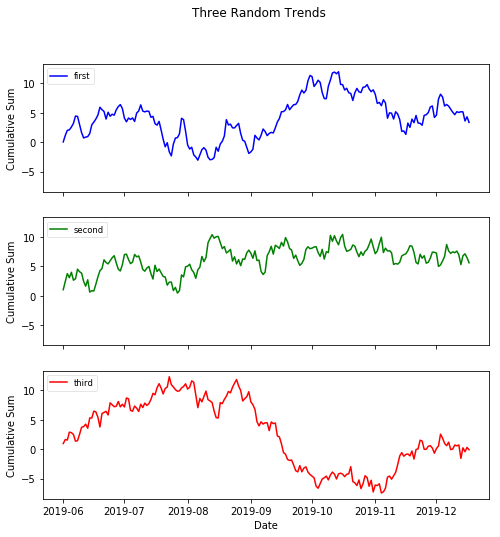

In [10]:
# create figure and axes objects
fig, axes = plt.subplots(
                        nrows = 3, ncols = 1, # three plots one top of each other
                        sharex = True, sharey = True, # shared common ranges of both x and y axis
                        figsize=(8, 8)
                        )

# arrange data for easier iteration
labelledData = zip(
                  y.transpose(), # y data
                  ('first', 'second', 'third'), # labels for each dimention
                  ('b', 'g', 'r') # color for each dimention
                  )

# super title
fig.suptitle("Three Random Trends")

# iterate over the 3 dimentions
for i, ld in enumerate(labelledData):
    ax = axes[i] # pick each axis
    ax.plot(x, ld[0], label = ld[1], color = ld[2]) # plot
    ax.set_ylabel('Cumulative Sum') # set y label for all
    ax.legend(loc = 'upper left', framealpha = 0.5, prop = {'size':'small'}) # show legend
    
axes[-1].set_xlabel('Date') # set x label only on last subplot